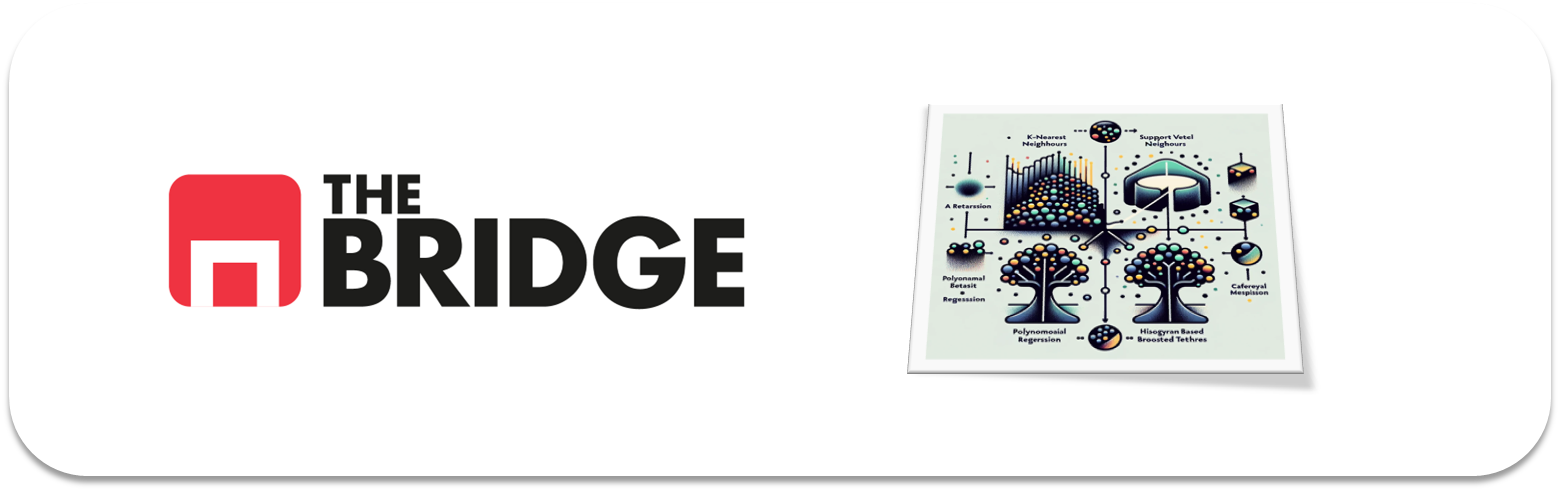

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
# Librerías base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías Bootcamp (Data Science - The Bridge Oct24')
import bootcampviztools as bvt
import toolbox_ML as tml

# Semilla 42 para garantizar que los datos se mantengan
np.random.seed(42)

# Modelos de ML (Clasificación y Regresión) a utilizar en el notebook
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

# Herramientas de sklearn
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


In [2]:
def plot_predictions_vs_actual(y_real, y_pred):
    """
    Función para graficar los valores reales vs. los valores predichos en una regresión.

    Args:
    y_real (array-like): Valores reales de la variable objetivo.
    y_pred (array-like): Valores predichos de la variable objetivo.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_real, alpha=0.5)
    plt.xlabel("Valores Predichos")
    plt.ylabel("Valores Reales")

    # Línea y=x
    max_value = max(max(y_real), max(y_pred))
    min_value = min(min(y_real), min(y_pred))
    plt.plot([min_value, max_value], [min_value, max_value], 'r')

    plt.title("Comparación de Valores Reales vs. Predichos")
    plt.show()

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [3]:
df = pd.read_csv("./data/wines_dataset.csv", sep = "|")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
tml.describe_df(df)

,Column Name,Data Type,Null Percentage (%),Unique Values,Cardinality (%)
0,fixed acidity,float64,0.0,106,1.631522
1,volatile acidity,float64,0.0,187,2.878252
2,citric acid,float64,0.0,89,1.369863
3,residual sugar,float64,0.0,316,4.863783
4,chlorides,float64,0.0,214,3.293828
5,free sulfur dioxide,float64,0.0,135,2.077882
6,total sulfur dioxide,float64,0.0,276,4.248115
7,density,float64,0.0,998,15.360936
8,pH,float64,0.0,108,1.662306
9,sulphates,float64,0.0,111,1.708481


In [6]:
tml.tipifica_variables(df,10,0.1)

,nombre_variable,tipo_sugerido
0,fixed acidity,Numérica Discreta
1,volatile acidity,Numérica Discreta
2,citric acid,Numérica Discreta
3,residual sugar,Numérica Discreta
4,chlorides,Numérica Discreta
5,free sulfur dioxide,Numérica Discreta
6,total sulfur dioxide,Numérica Discreta
7,density,Numérica Continua
8,pH,Numérica Discreta
9,sulphates,Numérica Discreta


In [7]:
target_c = "quality"
target_r = "alcohol"

In [8]:
# Diccionario de mapeo manual
mapping = {3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6}

# Aplicamos el mapeo
df[target_c] = df[target_c].map(mapping)

# Verificamos el resultado
print(f"Clases mapeadas: {df[target_c].unique()}")

Clases mapeadas: [3 4 0 2 1 5 6]


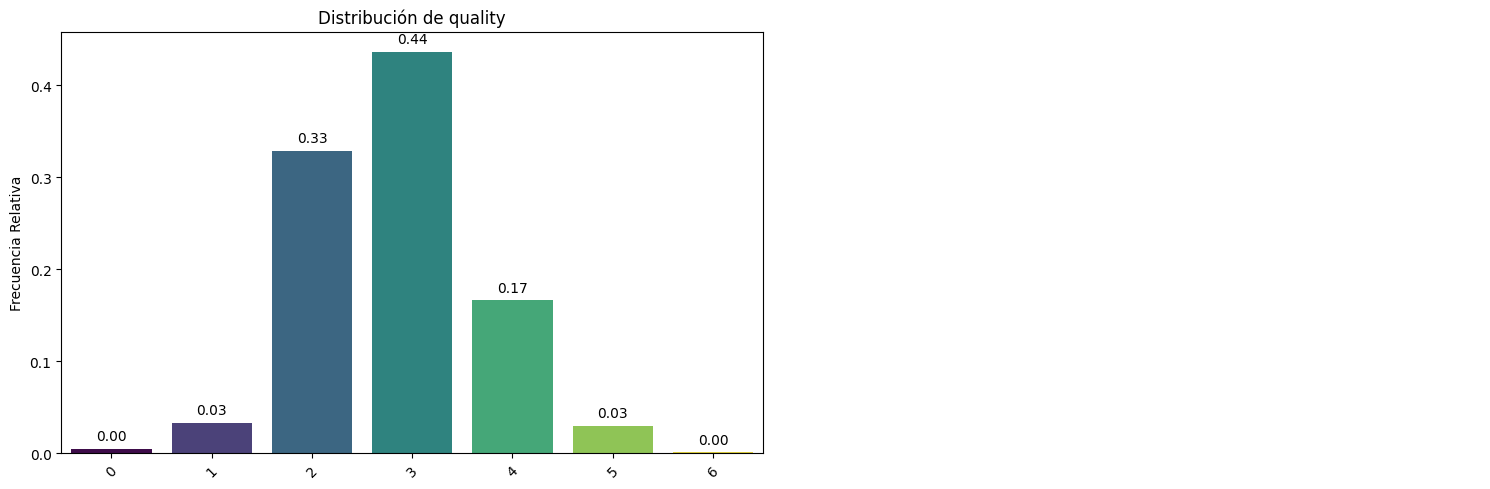

Se puede observar que no esta equilibrado


In [9]:
# Visualización de la distribución del target categórico
bvt.pinta_distribucion_categoricas(df, [target_c], mostrar_valores = True, relativa = True)
print("Se puede observar que no esta equilibrado")

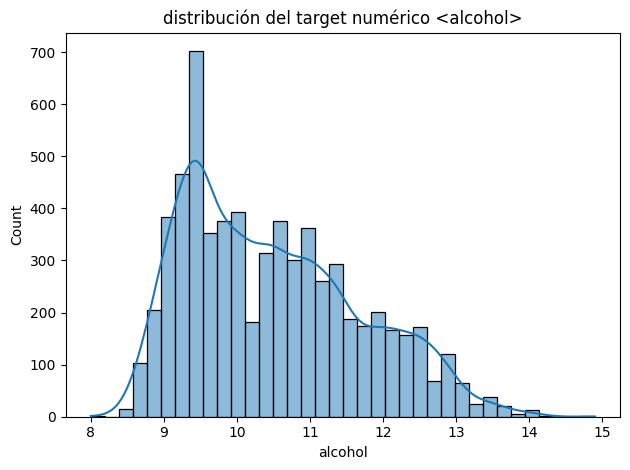

Se puede observar aunque no tenga una distribución completamente normal, no se aleja mucho de ella


In [10]:
# Visualización de la distribución del target numérico
sns.histplot(df[target_r], kde = True)
plt.title("distribución del target numérico <alcohol>")
plt.tight_layout()
plt.show()
print("Se puede observar aunque no tenga una distribución completamente normal, no se aleja mucho de ella")

# **2 Modelado para clasificación**

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

### 3. Train y Test  

In [11]:
train_set, test_set = train_test_split(df, test_size=0.2)

In [12]:
X_trainc = train_set.drop(columns=target_c)
X_testc = test_set.drop(columns=target_c)

y_trainc = train_set[target_c]
y_testc = test_set[target_c]

### 4. MiniEDA: Análisis del target, análisis bivariante, entendimiento de las features, selección de las mismas (si es necesario)  

In [13]:
feature_cat_clas = ["class"]
feature_num_clas = list(set(X_trainc.columns) - set(feature_cat_clas))
feature_num_clas

['volatile acidity',
 'alcohol',
 'fixed acidity',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'residual sugar',
 'citric acid',
 'density',
 'pH',
 'chlorides',
 'sulphates']

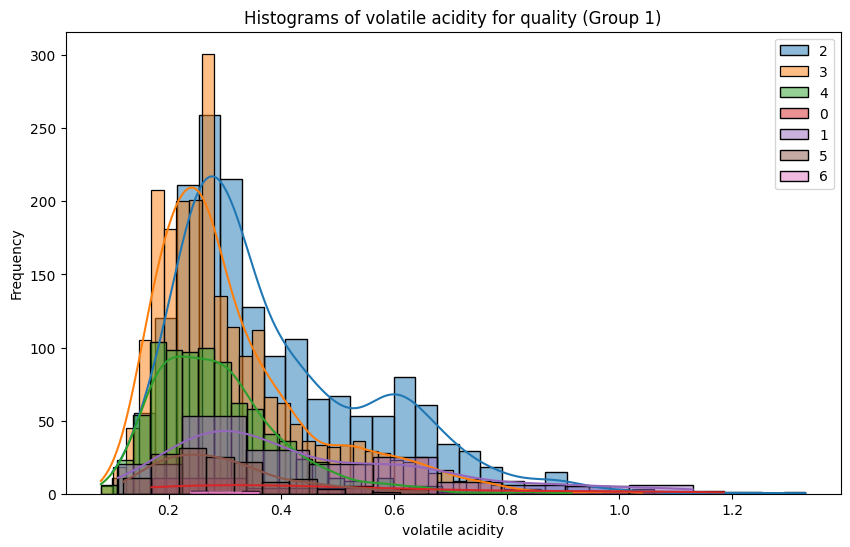

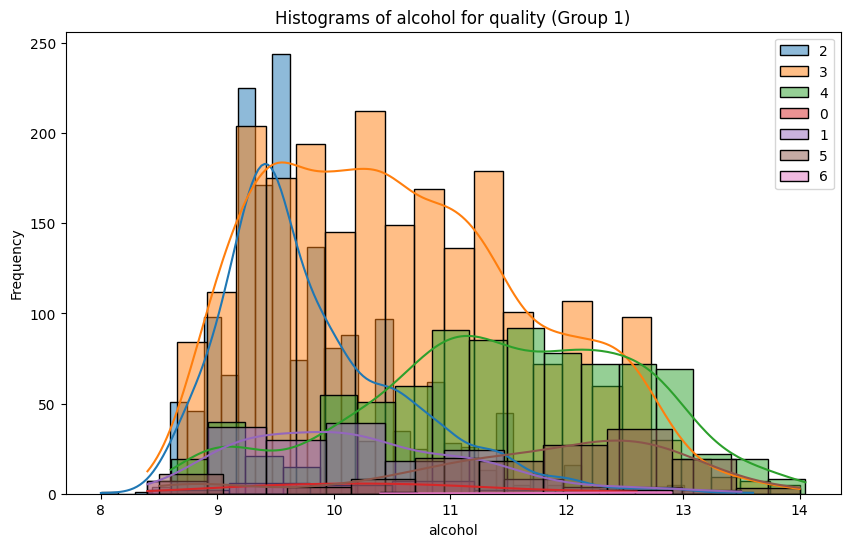

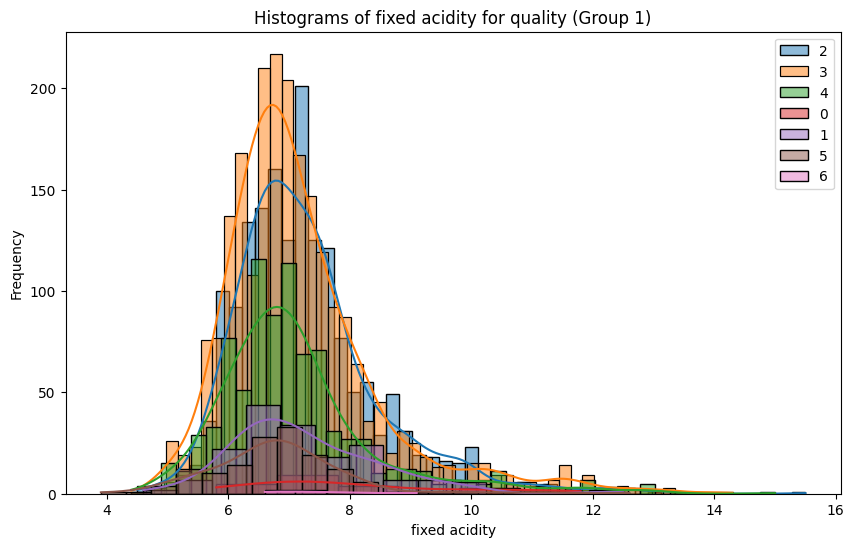

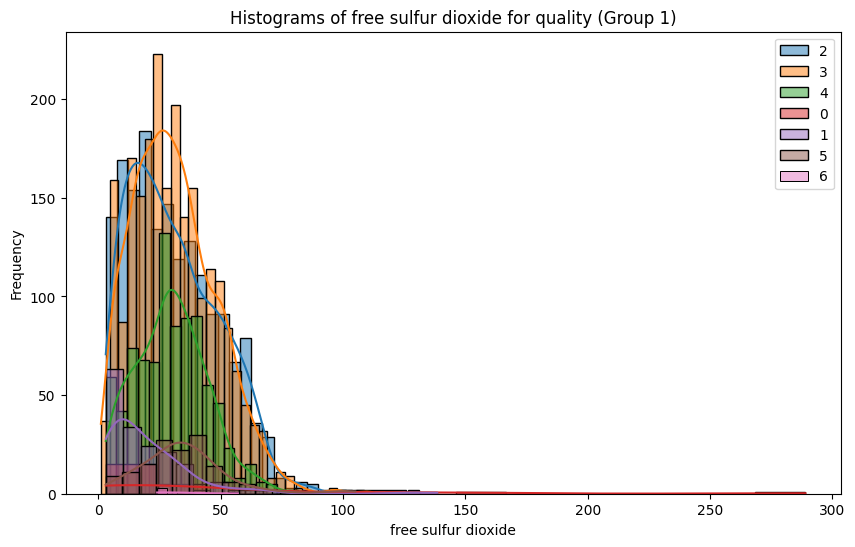

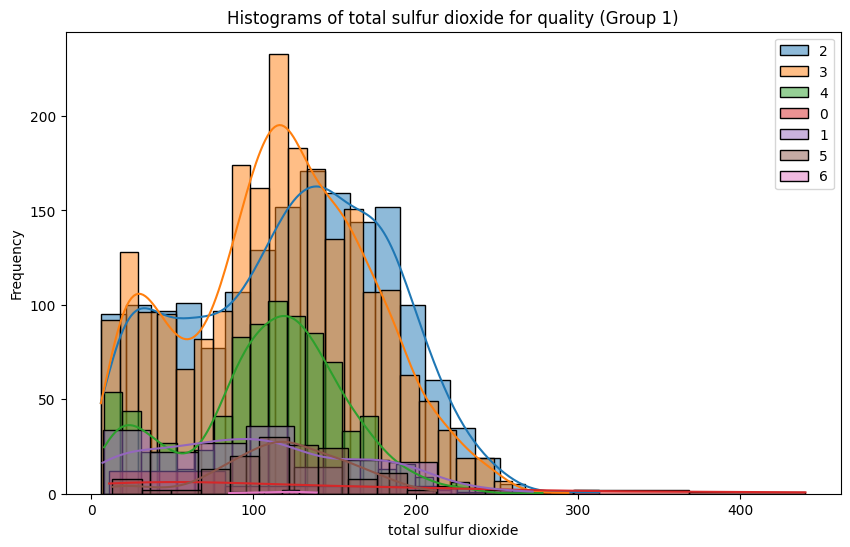

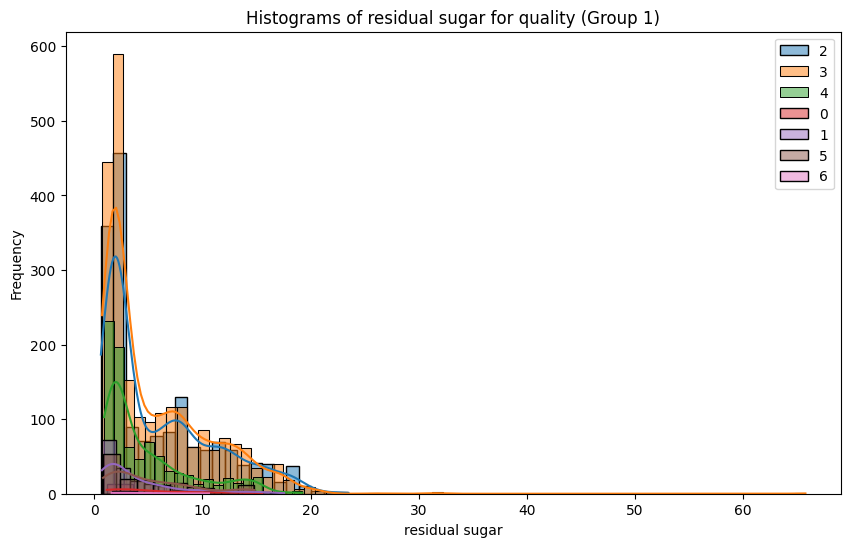

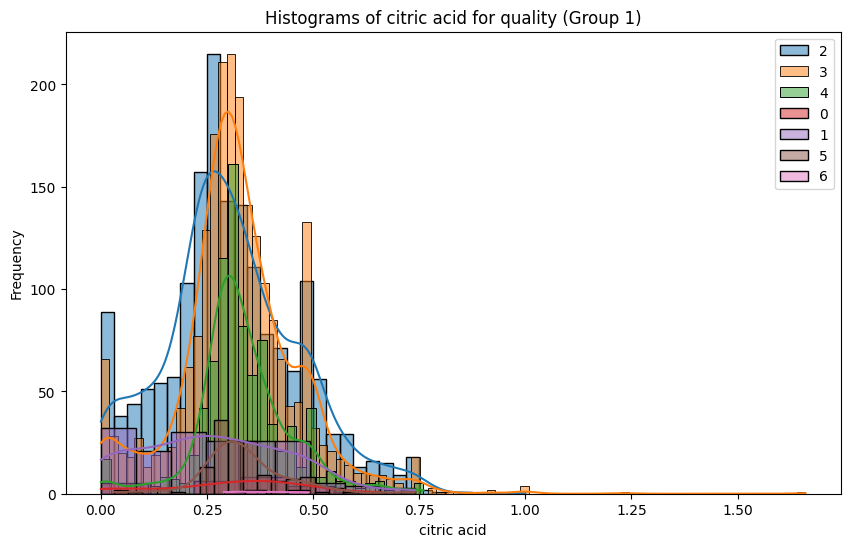

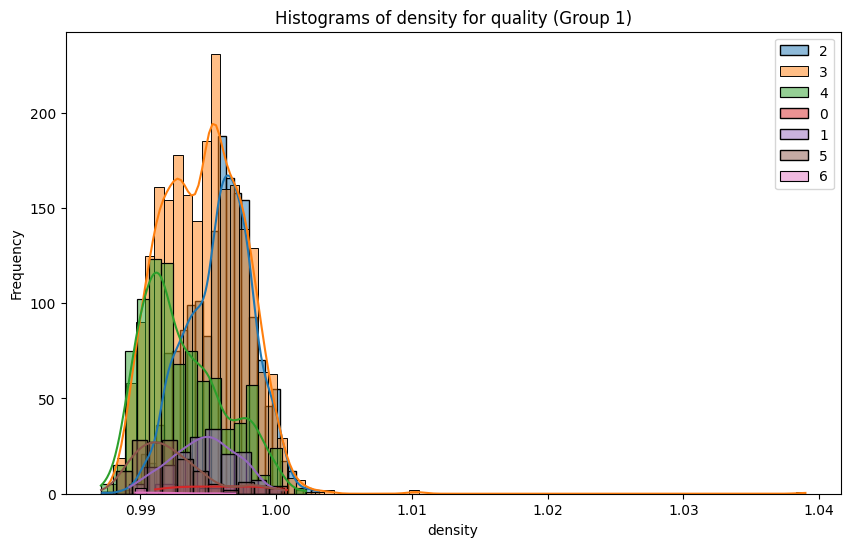

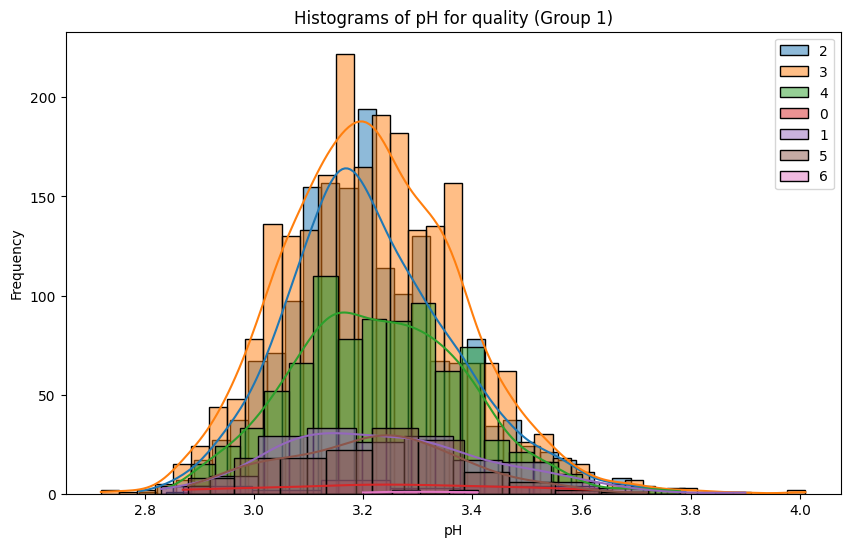

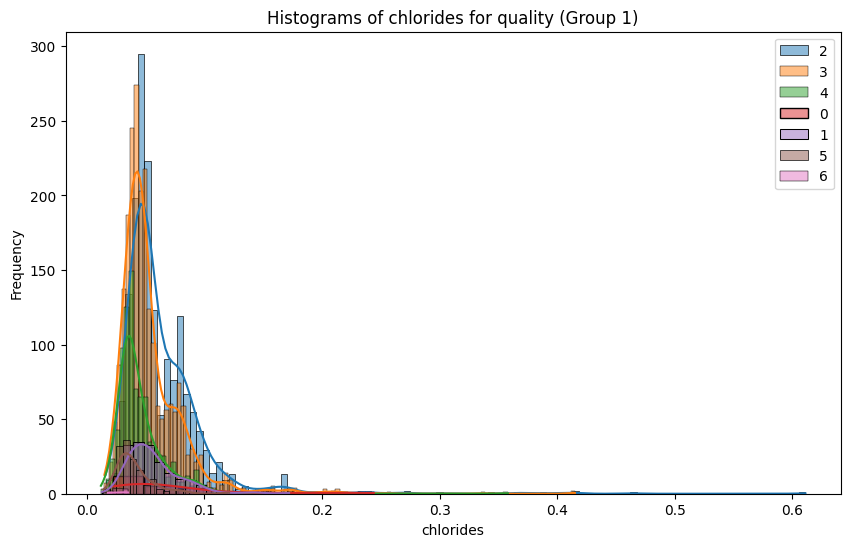

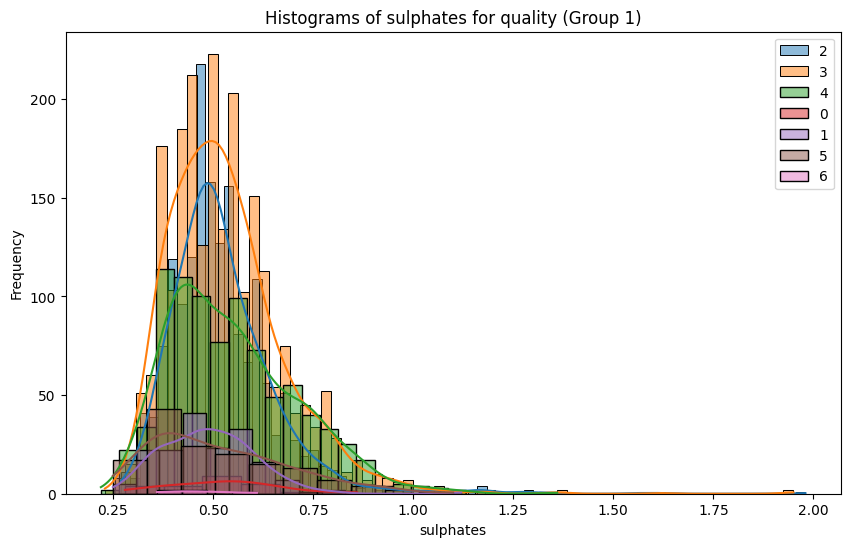

In [14]:
for col in X_trainc[feature_num_clas]:
    bvt.plot_grouped_histograms(train_set, cat_col= target_c, num_col= col, group_size= train_set[target_c].nunique())

In [15]:
# Matriz de correlación entre las todas las features y el target
abs(X_trainc.corrwith(y_trainc, numeric_only=True)).sort_values(ascending=False)

alcohol                 0.450403
density                 0.305107
volatile acidity        0.255368
chlorides               0.197389
citric acid             0.096020
fixed acidity           0.071698
sulphates               0.052398
total sulfur dioxide    0.050816
free sulfur dioxide     0.039678
residual sugar          0.039630
pH                      0.011918
dtype: float64

In [16]:
# Calcular la matriz de correlación entre las features
feature_corr = X_trainc.corr(numeric_only= True)

# Filtrar las correlaciones absolutas entre 0.7 y 1 o entre -0.7 y -1
selected_features = feature_corr[
    (feature_corr.abs() >= 0.7) & (feature_corr.abs() <= 1)
].stack().reset_index()

# Renombrar columnas para claridad
selected_features.columns = ['Feature1', 'Feature2', 'Correlation']

# Eliminar duplicados y valores de la diagonal principal (correlación con sí misma)
selected_features = selected_features[
    (selected_features['Feature1'] != selected_features['Feature2'])
].drop_duplicates(subset=['Correlation'])

# Mostrar las correlaciones seleccionadas
selected_features

,Feature1,Feature2,Correlation
6,free sulfur dioxide,total sulfur dioxide,0.723322


In [17]:
features_corr_c = tml.seleccionar_features(train_set, target_c)
print("Features seleccionadas:", features_corr_c)

features_c = X_trainc.columns.to_list()
print("Todas las features:", features_c)

Features seleccionadas: ['volatile acidity', 'chlorides', 'density', 'alcohol']
Todas las features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'class']


### 5. Tratamiento de features

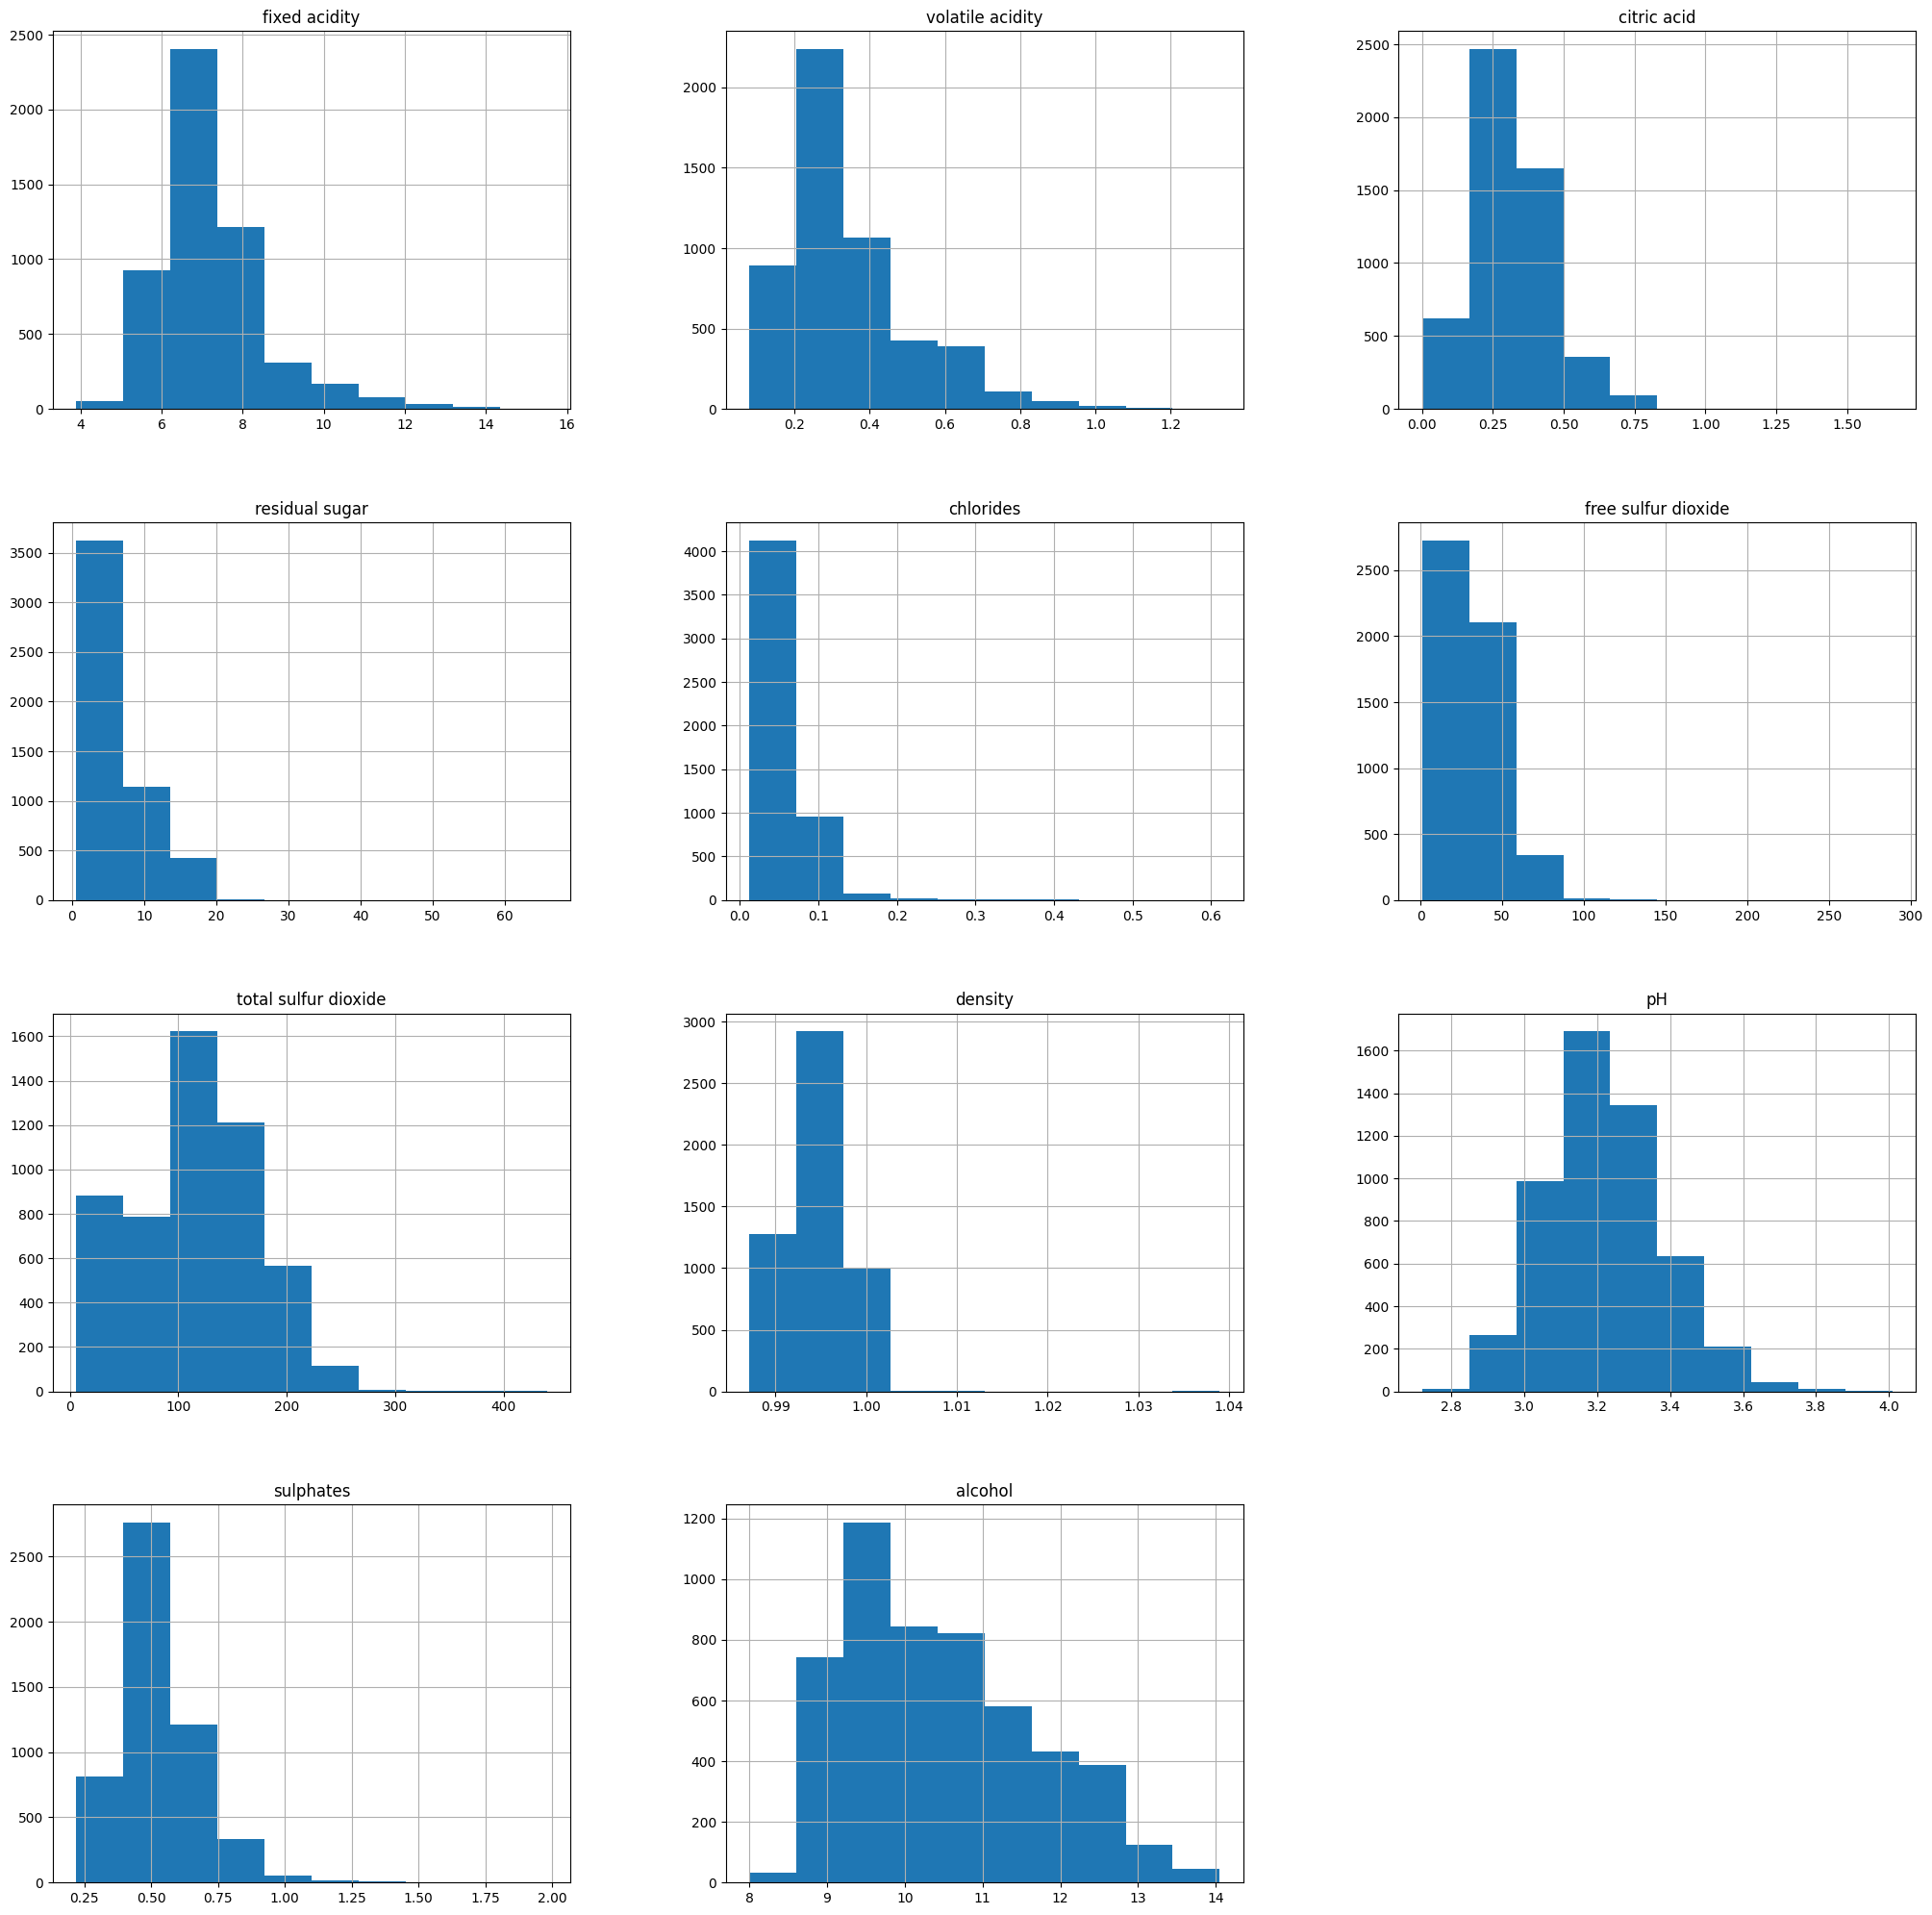

In [18]:
train_set[features_c].hist(figsize = (25,25))
plt.tight_layout;

In [19]:
train_set['class'] = train_set['class'].map({'white': 0, 'red': 1})
test_set['class'] = test_set['class'].map({'white': 0, 'red': 1})

In [20]:
train_setc_scaled = train_set.copy()
test_setc_scaled = test_set.copy()

In [21]:
features_log = ["free sulfur dioxide", "residual sugar", "chlorides", "density", "sulphates", "citric acid", "total sulfur dioxide"]

In [22]:
# Aplicar log1p (asi nos aseguramos que no haya error con las que comiencen en 0) a las características en features_log

for feature in features_log:
    train_setc_scaled[feature] = np.log1p(train_setc_scaled[feature])
    test_setc_scaled[feature] = np.log1p(test_setc_scaled[feature])

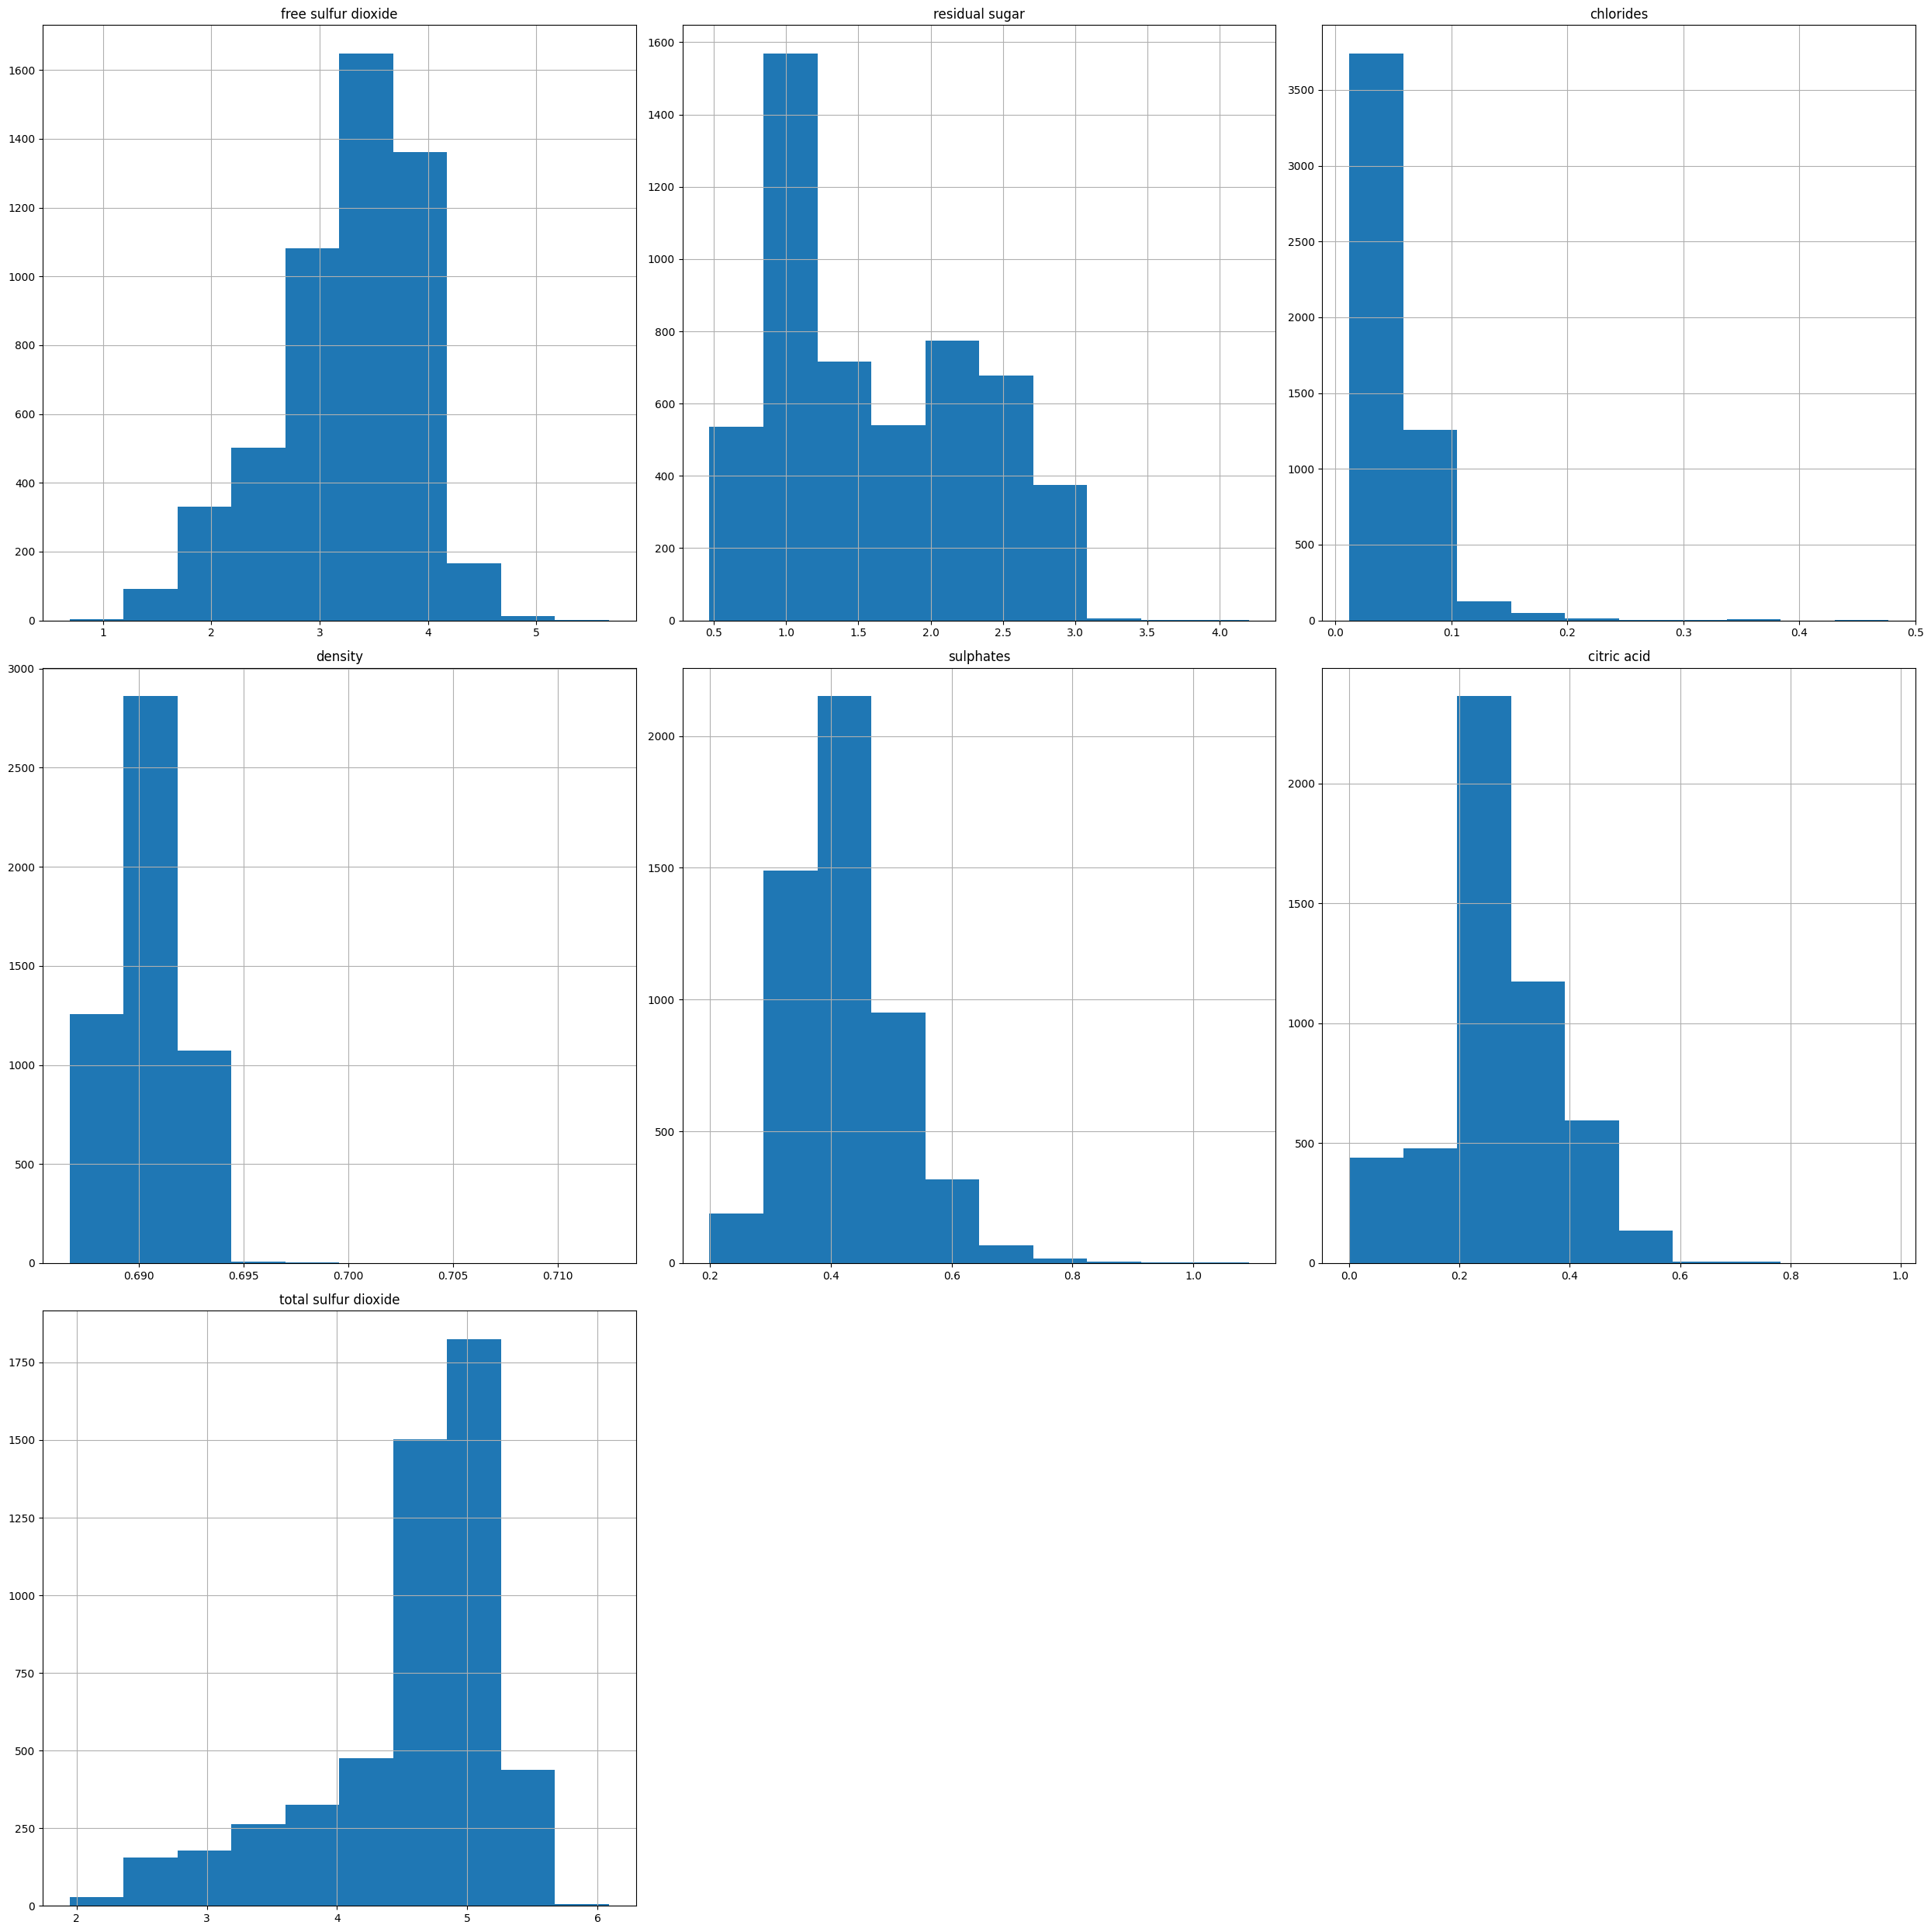

In [23]:
train_setc_scaled[features_log].hist(figsize = (25,25))

plt.tight_layout()

In [24]:
scaler = StandardScaler()
train_setc_scaled[features_c] = scaler.fit_transform(train_setc_scaled[features_c])
test_setc_scaled[features_c] = scaler.transform(test_setc_scaled[features_c])

In [25]:
# Creación de diversos X dependiendo de las features a seleccionar

# TRAIN SET
X_trainc_all = train_set[features_c] # Todas las features sin escalar train_set
X_trainc_scaled = train_setc_scaled[features_c] # Todas las features escaladas train_set

X_trainc_1 = train_set[features_corr_c] # Selección de las features mas importantes sin escalar train_set
X_trainc_scaled_1 = train_setc_scaled[features_corr_c] # Selección de las mas importantes escaladas train_set

y_trainc = train_set[target_c] # Target

# TEST SET
X_testc_all = test_set[features_c] # Todas las features sin escalar test_set
X_testc_scaled = test_setc_scaled[features_c] # Todas las features escaladas test_set

X_testc_1 = test_set[features_corr_c] # Selección de las features mas importantes sin escalar test_set
X_testc_scaled_1 = test_setc_scaled[features_corr_c] # Selección de las mas importantes escaladas test_set

y_testc = test_set[target_c] # Target

### 6. Selección e instanciación de modelos. Baseline.

In [26]:
lr_clf = LogisticRegression(max_iter = 5000)
rf_clf = RandomForestClassifier(max_depth= 5)
lgb_clf = LGBMClassifier(max_depth= 5, verbose = -100)
xgb_clf = XGBClassifier(max_depth = 5)

modelos = {"Regresion Logistica": lr_clf,
           "Random Forest": rf_clf,
           "Lightgbm": lgb_clf,
           "XGBoost": xgb_clf}

### 7. Comparativa de modelos

In [27]:
print(y_trainc.unique())


[2 3 4 0 1 5 6]


In [28]:
# Definir la métrica de evaluación
scoring_func = "balanced_accuracy"  # Se usa balanced accuracy

# Diccionario para almacenar los mejores resultados
resultados = {}

# Conjuntos de features (incluyendo escalado para regresión logística)
feature_sets = {
    "Todas las features": (X_trainc_all, X_trainc_scaled),
    "Features más importantes": (X_trainc_1, X_trainc_scaled_1),
}

# Evaluar cada modelo con cada conjunto de features
for nombre_modelo, modelo in modelos.items():
    print(f"\nModelo: {nombre_modelo}")
    mejores_resultados = {}

    for nombre_feat, (X_trainc, X_trainc_scaled) in feature_sets.items():
        # Usar el conjunto escalado solo en la regresión logística
        if nombre_modelo == "Regresion Logistica":
            X_trainc_usar = X_trainc_scaled
        else:
            X_trainc_usar = X_trainc

        # Validación cruzada con 5 folds
        scores = cross_val_score(modelo, X_trainc_usar, y_trainc, cv=5, scoring=scoring_func)
        recall_medio = np.mean(scores)

        mejores_resultados[nombre_feat] = recall_medio
        print(f"  {nombre_feat}: Recall Medio = {recall_medio:.4f}")

    # Guardamos el mejor resultado del modelo
    mejor_feature_set = max(mejores_resultados, key=mejores_resultados.get)
    resultados[nombre_modelo] = (mejor_feature_set, mejores_resultados[mejor_feature_set])

# Mostrar el mejor resultado por modelo
print("\n🏆 Mejor score (balanced accuracy) por modelo:")
for modelo, (feat_set, score) in resultados.items():
    print(f"{modelo}: {feat_set} con {score:.4f}")



Modelo: Regresion Logistica
  Todas las features: Recall Medio = 0.2306
  Features más importantes: Recall Medio = 0.2128

Modelo: Random Forest
  Todas las features: Recall Medio = 0.2151
  Features más importantes: Recall Medio = 0.2140

Modelo: Lightgbm
  Todas las features: Recall Medio = 0.3164
  Features más importantes: Recall Medio = 0.2642

Modelo: XGBoost
  Todas las features: Recall Medio = 0.3345
  Features más importantes: Recall Medio = 0.2866

🏆 Mejor score (balanced accuracy) por modelo:
Regresion Logistica: Todas las features con 0.2306
Random Forest: Todas las features con 0.2151
Lightgbm: Todas las features con 0.3164
XGBoost: Todas las features con 0.3345


### 8. Ajuste de hiperparámetros

In [29]:
# Definir la métrica de evaluación
scoring_func = "balanced_accuracy"  # Se usa balanced accuracy

# Diccionario para almacenar los mejores resultados
resultados = {}

# Hiperparámetros para cada modelo
param_grid = {
    "Regresion Logistica": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"],
        "class_weight": ["balanced", None]  # Se agrega class_weight=balanced
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 10, None],
        "class_weight": ["balanced", None]  # Se agrega class_weight=balanced
    },
    "Lightgbm": {
        "num_leaves": [10, 20, 30],
        "learning_rate": [0.01, 0.1, 0.2],
        "n_estimators": [50, 100, 200],
        "scale_pos_weight": [1, 2, 5]  # Escala de ponderación para tratar el desbalanceo
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "n_estimators": [50, 100, 200],
        "scale_pos_weight": [1, 2, 5]  # Escala de ponderación para tratar el desbalanceo
    }
}

# Conjuntos de features (incluyendo escalado para regresión logística)
feature_sets = {
    "Todas las features": (X_trainc_all, X_trainc_scaled),
    "Features más importantes": (X_trainc_1, X_trainc_scaled_1),
}

# Evaluar cada modelo con cada conjunto de features
for nombre_modelo, modelo in modelos.items():
    print(f"\n🔍 Ajustando modelo: {nombre_modelo}")
    mejores_resultados = {}

    for nombre_feat, (X_trainc, X_trainc_scaled) in feature_sets.items():
        # Usar el conjunto escalado solo en la regresión logística
        if nombre_modelo == "Regresion Logistica":
            X_trainc_usar = X_trainc_scaled
        else:
            X_trainc_usar = X_trainc


        # GridSearchCV para encontrar los mejores hiperparámetros
        grid_search = GridSearchCV(
            modelo,
            param_grid[nombre_modelo],
            cv=5,
            scoring=scoring_func,
            n_jobs=-1
        )

        grid_search.fit(X_trainc_usar, y_trainc)
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_

        mejores_resultados[nombre_feat] = (best_score, best_params)
        print(f"  {nombre_feat}: Mejor Recall Medio = {best_score:.4f}, Hiperparámetros = {best_params}")

    # Guardamos el mejor resultado del modelo
    mejor_feature_set = max(mejores_resultados, key=lambda k: mejores_resultados[k][0])
    resultados[nombre_modelo] = (mejor_feature_set, *mejores_resultados[mejor_feature_set])

# Mostrar el mejor resultado por modelo
print("\n🏆 Mejor configuración por modelo:")
for modelo, (feat_set, score, params) in resultados.items():
    print(f"{modelo}: {feat_set} con {score:.4f}, Hiperparámetros óptimos: {params}")


🔍 Ajustando modelo: Regresion Logistica
  Todas las features: Mejor Recall Medio = 0.3380, Hiperparámetros = {'C': 0.01, 'class_weight': 'balanced', 'solver': 'lbfgs'}
  Features más importantes: Mejor Recall Medio = 0.3380, Hiperparámetros = {'C': 0.01, 'class_weight': 'balanced', 'solver': 'lbfgs'}

🔍 Ajustando modelo: Random Forest
  Todas las features: Mejor Recall Medio = 0.3492, Hiperparámetros = {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 100}
  Features más importantes: Mejor Recall Medio = 0.3274, Hiperparámetros = {'class_weight': None, 'max_depth': None, 'n_estimators': 100}

🔍 Ajustando modelo: Lightgbm
  Todas las features: Mejor Recall Medio = 0.3542, Hiperparámetros = {'learning_rate': 0.2, 'n_estimators': 100, 'num_leaves': 10, 'scale_pos_weight': 1}
  Features más importantes: Mejor Recall Medio = 0.2987, Hiperparámetros = {'learning_rate': 0.2, 'n_estimators': 200, 'num_leaves': 30, 'scale_pos_weight': 1}

🔍 Ajustando modelo: XGBoost


c:\Users\rafae\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:29:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


  Todas las features: Mejor Recall Medio = 0.3473, Hiperparámetros = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 1}


c:\Users\rafae\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:29:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


  Features más importantes: Mejor Recall Medio = 0.3151, Hiperparámetros = {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 1}

🏆 Mejor configuración por modelo:
Regresion Logistica: Todas las features con 0.3380, Hiperparámetros óptimos: {'C': 0.01, 'class_weight': 'balanced', 'solver': 'lbfgs'}
Random Forest: Todas las features con 0.3492, Hiperparámetros óptimos: {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 100}
Lightgbm: Todas las features con 0.3542, Hiperparámetros óptimos: {'learning_rate': 0.2, 'n_estimators': 100, 'num_leaves': 10, 'scale_pos_weight': 1}
XGBoost: Todas las features con 0.3473, Hiperparámetros óptimos: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 1}


### 9. Evaluación del modelo


📝 Informe de clasificación del modelo en el conjunto de test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.26      0.14      0.18        43
           2       0.60      0.56      0.58       432
           3       0.56      0.63      0.60       562
           4       0.49      0.43      0.46       210
           5       0.40      0.36      0.38        47
           6       0.00      0.00      0.00         0

    accuracy                           0.55      1300
   macro avg       0.33      0.30      0.31      1300
weighted avg       0.55      0.55      0.54      1300

Accuracy del modelo en el conjunto de prueba: 0.5469


c:\Users\rafae\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rafae\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rafae\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

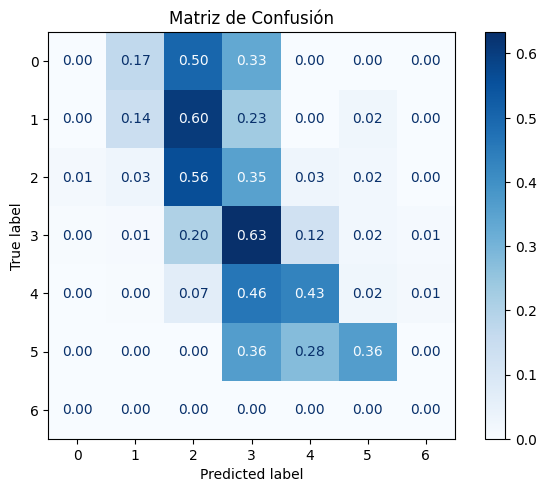

In [30]:
# Seleccionar el mejor modelo y conjunto de características
mejor_modelo_nombre = "Lightgbm"  # El modelo ganador de la validación cruzada
best_params = resultados[mejor_modelo_nombre][1]

# Ajustamos el modelo con los mejores hiperparámetros
modelo_final = LGBMClassifier(
    learning_rate=0.2,
    n_estimators=100,
    num_leaves=10,
    scale_pos_weight=1
)
# Entrenamos el modelo final en el conjunto de entrenamiento
modelo_final.fit(X_trainc_all, y_trainc)

# Realizamos la predicción sobre el conjunto de test
y_pred = modelo_final.predict(X_testc_all)

# Generar el informe de clasificación
print("\n📝 Informe de clasificación del modelo en el conjunto de test:")
print(classification_report(y_testc, y_pred))

# Obtener la precisión general
accuracy = accuracy_score(y_testc, y_pred)
print(f"Accuracy del modelo en el conjunto de prueba: {accuracy:.4f}")

# Generar la matriz de confusión
cm = confusion_matrix(y_testc, y_pred)

# Mostrar la matriz de confusión normalizada
ConfusionMatrixDisplay.from_predictions(
    y_testc, y_pred, normalize="true", cmap='Blues', values_format='.2f')

# Mejorar el diseño
plt.tight_layout()
plt.title('Matriz de Confusión')
plt.show()


### 11. Análisis de errores, posibles acciones futuras.  

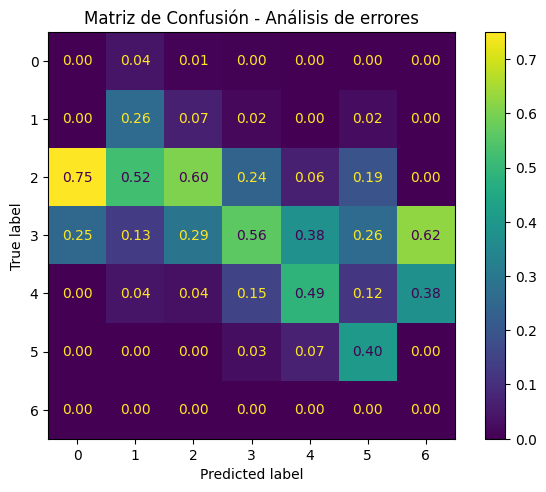

In [31]:
# Mostrar la matriz de confusión con valores flotantes
ConfusionMatrixDisplay.from_predictions(y_testc, y_pred, values_format='.2f', normalize="pred")
plt.tight_layout()
plt.title('Matriz de Confusión - Análisis de errores')
plt.show()

# **3 Modelado para regresión**

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

## 1. Train y Test

In [32]:
X_trainr = train_set.drop(columns=target_r)
X_testr = test_set.drop(columns=target_r)

y_trainr = train_set[target_r]
y_testr = test_set[target_r]

## 2. MiniEDA

In [33]:
feature_cat_reg = ["class", "quality"]
feature_num_reg = list(set(X_trainc.columns) - set(feature_cat_reg))
feature_num_reg

['volatile acidity', 'chlorides', 'alcohol', 'density']

In [34]:
# Matriz de correlación entre las todas las features y el target
abs(X_trainr.corrwith(y_trainr, numeric_only=True)).sort_values(ascending=False)

density                 0.682345
quality                 0.450403
residual sugar          0.357459
total sulfur dioxide    0.272970
chlorides               0.260508
free sulfur dioxide     0.188460
pH                      0.116497
fixed acidity           0.091964
volatile acidity        0.036041
class                   0.026966
citric acid             0.005690
sulphates               0.000412
dtype: float64

In [35]:
# Calcular la matriz de correlación entre las features
feature_corr = X_trainr.corr()

# Filtrar las correlaciones absolutas entre 0.7 y 1 o entre -0.7 y -1
selected_features = feature_corr[
    (feature_corr.abs() >= 0.7) & (feature_corr.abs() <= 1)
].stack().reset_index()

# Renombrar columnas para claridad
selected_features.columns = ['Feature1', 'Feature2', 'Correlation']

# Eliminar duplicados y valores de la diagonal principal (correlación con sí misma)
selected_features = selected_features[
    (selected_features['Feature1'] != selected_features['Feature2'])
].drop_duplicates(subset=['Correlation'])

# Mostrar las correlaciones seleccionadas
selected_features

,Feature1,Feature2,Correlation
6,free sulfur dioxide,total sulfur dioxide,0.723322
9,total sulfur dioxide,class,-0.701692


In [39]:
featuresr_alta_corr = tml.seleccionar_features(train_set, target_r,  umbral_correlacion = 0.10, umbral_correlacion_entre_features = 0.8)
print("Features seleccionadas:", featuresr_alta_corr)

Features seleccionadas: ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'quality']


In [40]:
featuresr_baja_corr = tml.seleccionar_features(train_set, target_r, umbral_correlacion = 0.10, umbral_correlacion_entre_features = 0.71)
print("Features seleccionadas:", featuresr_baja_corr)

Features seleccionadas: ['residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'quality']


In [41]:
featuresr = X_trainr.columns.to_list()
print("Conjunto de todas las features del data set", featuresr)
print("Conjunto de features con una alta correlación entre ellas", featuresr_alta_corr)
print("Conjunto de features con una baja correlación entre ellas", featuresr_baja_corr)

Conjunto de todas las features del data set ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'quality', 'class']
Conjunto de features con una alta correlación entre ellas ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'quality']
Conjunto de features con una baja correlación entre ellas ['residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'quality']


## 3. Tratamiento de features

- No instanciaré ningún modelo sensible a la escala, por lo que no tengo que escalar/transformar las features

## 4. Creación de los dataset de train y test

In [42]:
# Crear las listas X_train, X_test según las nuevas categorías

# TRAIN SET
X_trainr_alta_corr = train_set[featuresr_alta_corr]  # Características con alta correlación
X_trainr_baja_corr = train_set[featuresr_baja_corr]  # Características con baja correlación
X_trainr_all = train_set[featuresr]  # Conjunto de todas las features

y_trainr = train_set[target_r]  # Target

# TEST SET
X_testr_alta_corr = test_set[featuresr_alta_corr]  # Características con alta correlación
X_testr_baja_corr = test_set[featuresr_baja_corr]  # Características con baja correlación
X_testr_all = test_set[featuresr]  # Conjunto de todas las features

y_testr = test_set[target_r]  # Target

## 5. Selección e instanciación de modelos. Baseline.

In [43]:
rf_reg = RandomForestRegressor(max_depth = 15) 
xgb_reg = XGBRegressor(max_depth = 15)
lgb_reg = LGBMRegressor(max_depth = 15, verbose = -100)

modelos = {
    "Random Forest": rf_reg,
    "Lightgbm": lgb_reg,
    "XGBoost": xgb_reg
}

## 6. Comparativa de modelos

In [49]:
# Definir la métrica de evaluación
scoring_func = "neg_mean_absolute_error"  # Negativo porque cross_val_score busca maximizar el score

# Diccionario para almacenar los mejores resultados
resultados = {}

# Conjuntos de features
feature_sets = {
    "Alta correlación": (X_trainr_alta_corr),
    "Baja correlación": (X_trainr_baja_corr),
    "Todas las features": (X_trainr_all)
}

# Modelos
modelos = {
    "Random Forest": rf_reg,
    "Lightgbm": lgb_reg,
    "XGBoost": xgb_reg
}

# Evaluar cada modelo con cada conjunto de features
for nombre_modelo, modelo in modelos.items():
    print(f"\nModelo: {nombre_modelo}")
    mejores_resultados = {}

    for nombre_feat, X_train in feature_sets.items():
        # Validación cruzada con 5 folds
        scores = cross_val_score(modelo, X_train, y_trainr, cv=5, scoring=scoring_func)
        mae_medio = -np.mean(scores)  # Se multiplica por -1 porque 'neg_mean_absolute_error' devuelve valores negativos

        mejores_resultados[nombre_feat] = mae_medio
        print(f"  {nombre_feat}: MAE Medio = {mae_medio:.4f}")

    # Guardamos el mejor resultado del modelo
    mejor_feature_set = min(mejores_resultados, key=mejores_resultados.get)
    resultados[nombre_modelo] = (mejor_feature_set, mejores_resultados[mejor_feature_set])

# Mostrar el mejor resultado por modelo
print("\n🏆 Mejor score (MAE) por modelo:")
for modelo, (feat_set, score) in resultados.items():
    print(f"{modelo}: {feat_set} con MAE = {score:.4f}")



Modelo: Random Forest
  Alta correlación: MAE Medio = 0.3542
  Baja correlación: MAE Medio = 0.3645
  Todas las features: MAE Medio = 0.2878

Modelo: Lightgbm
  Alta correlación: MAE Medio = 0.3822
  Baja correlación: MAE Medio = 0.3923
  Todas las features: MAE Medio = 0.2824

Modelo: XGBoost
  Alta correlación: MAE Medio = 0.3400
  Baja correlación: MAE Medio = 0.3446
  Todas las features: MAE Medio = 0.2760

🏆 Mejor score (MAE) por modelo:
Random Forest: Todas las features con MAE = 0.2878
Lightgbm: Todas las features con MAE = 0.2824
XGBoost: Todas las features con MAE = 0.2760


## 7. Ajuste de hiperparámetros

In [45]:
# Definir la métrica de evaluación
scoring_func = "neg_mean_absolute_error"  # Se usa error absoluto medio negativo para regresión

# Diccionario para almacenar los mejores resultados
resultados = {}

# Hiperparámetros para cada modelo
param_grid = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 10, None],
    },
    "Lightgbm": {
        "num_leaves": [10, 20, 30],
        "learning_rate": [0.01, 0.1, 0.2],
        "n_estimators": [50, 100, 200],
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "n_estimators": [50, 100, 200],
    }
}

# Conjuntos de features
feature_sets = {
    "Todas las features": (X_trainr_all),
    "Características alta correlación": (X_trainr_alta_corr),
    "Características baja correlación": (X_trainr_baja_corr),
}

# Evaluar cada modelo con cada conjunto de features
for nombre_modelo, modelo in modelos.items():
    print(f"\n🔍 Ajustando modelo: {nombre_modelo}")
    mejores_resultados = {}

    for nombre_feat, X_train in feature_sets.items():
        # GridSearchCV para encontrar los mejores hiperparámetros
        grid_search = GridSearchCV(
            modelo,
            param_grid[nombre_modelo],
            cv=5,
            scoring=scoring_func,
            n_jobs=-1
        )

        grid_search.fit(X_train, y_trainr)
        best_score = -1*(grid_search.best_score_)
        best_params = grid_search.best_params_

        mejores_resultados[nombre_feat] = (best_score, best_params)
        print(f"  {nombre_feat}: Mejor MAE = {best_score:.4f}, Hiperparámetros = {best_params}")

    # Guardamos el mejor resultado del modelo
    mejor_feature_set = min(mejores_resultados, key=lambda k: mejores_resultados[k][0])
    resultados[nombre_modelo] = (mejor_feature_set, *mejores_resultados[mejor_feature_set])

# Mostrar el mejor resultado por modelo
print("\n🏆 Mejor score (MAE) por modelo optimizado:")
for modelo, (feat_set, score, params) in resultados.items():
    print(f"{modelo}: {feat_set} con MAE = {score:.4f}, Hiperparámetros óptimos: {params}")


🔍 Ajustando modelo: Random Forest
  Todas las features: Mejor MAE = 0.2824, Hiperparámetros = {'max_depth': None, 'n_estimators': 200}
  Características alta correlación: Mejor MAE = 0.3460, Hiperparámetros = {'max_depth': None, 'n_estimators': 100}
  Características baja correlación: Mejor MAE = 0.3542, Hiperparámetros = {'max_depth': None, 'n_estimators': 100}

🔍 Ajustando modelo: Lightgbm
  Todas las features: Mejor MAE = 0.2579, Hiperparámetros = {'learning_rate': 0.2, 'n_estimators': 200, 'num_leaves': 30}
  Características alta correlación: Mejor MAE = 0.3639, Hiperparámetros = {'learning_rate': 0.2, 'n_estimators': 200, 'num_leaves': 30}
  Características baja correlación: Mejor MAE = 0.3757, Hiperparámetros = {'learning_rate': 0.2, 'n_estimators': 200, 'num_leaves': 30}

🔍 Ajustando modelo: XGBoost
  Todas las features: Mejor MAE = 0.2485, Hiperparámetros = {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
  Características alta correlación: Mejor MAE = 0.3414, Hiper

## 8. Evaluación del modelo

In [46]:
# Conjunto de características optimizado y mejor modelo para cada tipo
modelos_optimizados = {
    "Random Forest": RandomForestRegressor(max_depth=None, n_estimators=200),
    "Lightgbm": LGBMRegressor(learning_rate=0.2, n_estimators=200, num_leaves=30),
    "XGBoost": XGBRegressor(learning_rate=0.2, max_depth=7, n_estimators=200),
}

# Evaluar el modelo contra el conjunto de test
for nombre_modelo, modelo in modelos_optimizados.items():
    print(f"\nEvaluando {nombre_modelo} con el conjunto de test...")
    modelo.fit(X_trainr_all, y_trainr)  # Ajustamos el modelo con los mejores hiperparámetros
    y_pred = modelo.predict(X_testr_all)  # Realizamos las predicciones

    # Calcular el MAE en el conjunto de test
    mae_test = mean_absolute_error(y_testr, y_pred)
    print(f"  MAE en test: {mae_test:.4f}")
    
    # Calcular el RMSE en el conjunto de test
    rmse_test = np.sqrt(mean_squared_error(y_testr, y_pred))
    print(f"  RMSE en test: {rmse_test:.4f}")


Evaluando Random Forest con el conjunto de test...
  MAE en test: 0.2625
  RMSE en test: 0.4022

Evaluando Lightgbm con el conjunto de test...
  MAE en test: 0.2486
  RMSE en test: 0.3656

Evaluando XGBoost con el conjunto de test...
  MAE en test: 0.2341
  RMSE en test: 0.3680


## 9. Análisis de errores, posibles acciones futuras.  

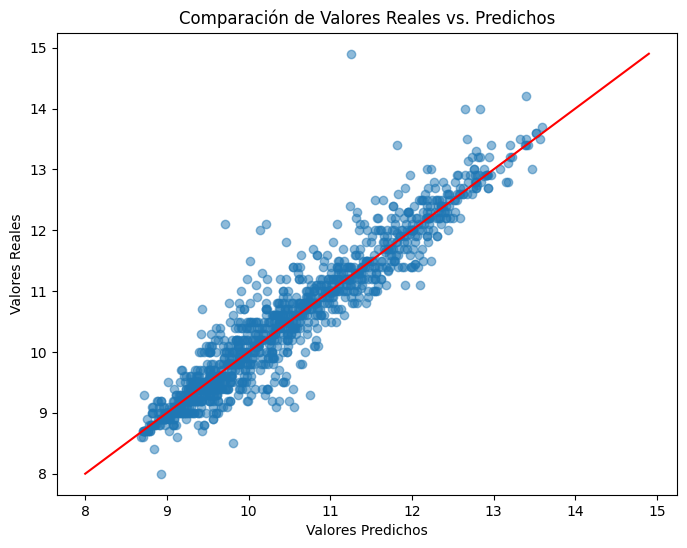

In [50]:
# Definir y entrenar el modelo XGBoost
modelo = XGBRegressor(learning_rate=0.1, max_depth=7, n_estimators=200)
modelo.fit(X_trainr_all, y_trainr)  # Ajustar el modelo con el conjunto de entrenamiento

# Realizar las predicciones en el conjunto de test
y_pred = modelo.predict(X_testr_all)

# Luego, puedes graficar las predicciones frente a los valores reales
plot_predictions_vs_actual(y_testr, y_pred)